In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ft2font
import AuxFunctions

In [12]:
#importing and using necessary files
config_file='./YOLO_files/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='./YOLO_files/frozen_inference_graph.pb'
#Tenserflow object detection model
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [14]:
#Reading Coco dataset
classLabels=[]
filename='./YOLO_files/yolo3b.txt'
with open(filename,'rt') as fpt:
      classLabels = fpt.read().rstrip('\n').split('\n')

print("Number of Classes")
print(len(classLabels))
print("Class labels")
print(classLabels)

Number of Classes
15
Class labels
['Trousers', 'Jeans', 'Shoes', 'Skirts', 'Tops', 'Tshirt', 'sunglasses', 'Dresses', 'Jackets', 'Sweaters', 'Suits', 'Pants', 'Coats', 'Shorts', 'Blouses']


In [21]:
#Model training
model.setInputSize(334,239)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001A2207BEEB0>

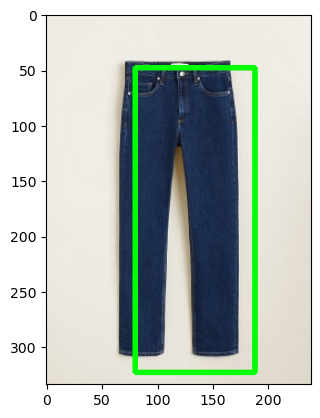

In [29]:
#img = cv2.imread('2019_43003701_TO.jpg')
img = cv2.imread('2019_43003701_TO.jpg')
#object detection
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)
#plotting boxes
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (0, 255, 0), 3)
#     cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 255), thickness=3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))